In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('goodreads.tsv' , sep='\t')
df.head()

,title,date,rating,body
0,The Body: A Guide for Occupants,"Oct 11, 2019",5.0,Lovingly presented with humour and kindness an...
1,Resistance Reborn,"Feb 28, 2020",4.0,I read through this book quicker than anticip...
2,The Book of Two Ways,"Jul 13, 2020",4.0,Jodi Picoult does it again in this new novel. ...
3,How to Write One Song: Loving the Things We Cr...,"Feb 21, 2021",4.0,I’m a music freak without a shred of musical a...
4,The Giver of Stars,"Sep 08, 2020",4.0,The Giver of Stars by Jojo Moyes won the Book ...


In [3]:
df=df.dropna()
df.tail()

,title,date,rating,body
8428,The Giver of Stars,"Feb 12, 2020",5.0,I loved this book! Let me start by saying that...
8429,Minor Feelings: An Asian American Reckoning,"May 21, 2020",4.0,What did i just read?I chose this title becaus...
8430,Trixie and Katya's Guide to Modern Womanhood,"Oct 29, 2020",4.0,**3.45 stars ( if we were using a 10/10 scale ...
8431,To Wake the Giant: A Novel of Pearl Harbor,"May 22, 2020",4.0,"Thanks to Netgalley, Random House and Ballenti..."
8432,Finding Ashley,"Apr 14, 2021",4.0,Finding Ashley starts with Melissa working har...


In [4]:
for i in range(0,len(df)-1):
    if type(df.iloc[i]['body']) != str:
        df.iloc[i]['body'] = str(df.iloc[i]['body'])
#function to represent sentiment -1(negetive);0(neutral);1(positive)
def sentiment(n):
    return 1 if n>=4 else (-1 if n<=2 else 0)
#Applying Sentiment Function 
df['sent'] = df['rating'].apply(sentiment)
df.head()        

,title,date,rating,body,sent
0,The Body: A Guide for Occupants,"Oct 11, 2019",5.0,Lovingly presented with humour and kindness an...,1
1,Resistance Reborn,"Feb 28, 2020",4.0,I read through this book quicker than anticip...,1
2,The Book of Two Ways,"Jul 13, 2020",4.0,Jodi Picoult does it again in this new novel. ...,1
3,How to Write One Song: Loving the Things We Cr...,"Feb 21, 2021",4.0,I’m a music freak without a shred of musical a...,1
4,The Giver of Stars,"Sep 08, 2020",4.0,The Giver of Stars by Jojo Moyes won the Book ...,1


In [6]:
# Cleaning Text

def clean_text(text):
    """
    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

In [7]:
x1 = []
sentences = list(df['body'])
for sen in sentences:
    x1.append(clean_text(sen))

df['review']=x1    
    
    

In [8]:
df.drop('body', axis='columns')



,title,date,rating,sent,review
0,The Body: A Guide for Occupants,"Oct 11, 2019",5.0,1,lovingly presented with humour and kindness an...
1,Resistance Reborn,"Feb 28, 2020",4.0,1,i read through this book quicker than anticipa...
2,The Book of Two Ways,"Jul 13, 2020",4.0,1,jodi picoult does it again in this new novel ...
3,How to Write One Song: Loving the Things We Cr...,"Feb 21, 2021",4.0,1,i’m a music freak without a shred of musical a...
4,The Giver of Stars,"Sep 08, 2020",4.0,1,the giver of stars by jojo moyes won the book ...
...,...,...,...,...,...
8428,The Giver of Stars,"Feb 12, 2020",5.0,1,i loved this book let me start by saying that...
8429,Minor Feelings: An Asian American Reckoning,"May 21, 2020",4.0,1,what did i just read i chose this title becaus...
8430,Trixie and Katya's Guide to Modern Womanhood,"Oct 29, 2020",4.0,1,3 45 stars if we were using a 10 10 scale ...
8431,To Wake the Giant: A Novel of Pearl Harbor,"May 22, 2020",4.0,1,thanks to netgalley random house and ballenti...


In [9]:
from textblob import TextBlob 
df['polarity'] = df['review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['reviewlen'] = df['review'].astype(str).apply(len)
df['wordcount'] = df['review'].apply(lambda x1: len(str(x1).split()))

In [10]:
print('10 random reviews with the highest positive sentiment polarity: \n')
d = df.loc[df.polarity == 1, ['review']].sample(10).values
for i in d:
    print(i[0])
    

10 random reviews with the highest positive sentiment polarity: 

excellent telling of history 
one of the best in the gray man series 
just wonderful 
each prayer  each meditation written by women who understand the importance of authenticity when speaking to god  this is the best prayer book ive ever read 
one of the best non fiction books ive ever read
one of the best books i have read this year 
gray man at his best  doing what he does best  murder   mayhem 
one of the best books released this year periodttttttt
the audiobook was as wonderful as i’d hoped it would be  but i want to look at the print version to see if images accompanied some advice like with the bangs  also  sarah  katya says the answer to “should i get bangs ” is always yes 
gray man at his best 


In [11]:
d1 = df.loc[df.polarity == 0, ['review']].sample(5).values
for x1 in d1:
    print(x1[0])

that ending   how am i supposed to wait for the next one   😵
“at what cost do i have this life  at what toll have i been granted this safety ”
i received a arc from netgalley and oneworld publications for an objection review  review nearer release date 
i needed this book  every time i’ve opened instagram in the past week  i think  “give me a pellet of rage  a pellet of affection  please  please  my pretty ”
a short short story as a bridge between the amber spyglass and the book of dust


In [12]:
#negative aspects reviews
d2 = df.loc[df.polarity == -1, ['review']].sample(5).values
for k in d2:
    print(k[0])
    
df.tail()    

what a terrible book 
i like star wars quite a lot but found this book boring so gave up at around 50 
this was one of the worst books i’ve ever read 
boring 
boring


,title,date,rating,body,sent,review,polarity,reviewlen,wordcount
8428,The Giver of Stars,"Feb 12, 2020",5.0,I loved this book! Let me start by saying that...,1,i loved this book let me start by saying that...,0.238110,3494,606
8429,Minor Feelings: An Asian American Reckoning,"May 21, 2020",4.0,What did i just read?I chose this title becaus...,1,what did i just read i chose this title becaus...,0.199269,614,118
8430,Trixie and Katya's Guide to Modern Womanhood,"Oct 29, 2020",4.0,**3.45 stars ( if we were using a 10/10 scale ...,1,3 45 stars if we were using a 10 10 scale ...,0.180000,307,59
8431,To Wake the Giant: A Novel of Pearl Harbor,"May 22, 2020",4.0,"Thanks to Netgalley, Random House and Ballenti...",1,thanks to netgalley random house and ballenti...,0.163472,2734,476
8432,Finding Ashley,"Apr 14, 2021",4.0,Finding Ashley starts with Melissa working har...,1,finding ashley starts with melissa working har...,0.261915,608,107


In [13]:
# making separate columns from new data frame 
frame = df["date"].str.split(",", n = 1, expand = True)  
df["day"]= frame[0] 
df["year"]= frame[1]

df=df.drop(['date'],axis=1)


In [14]:
frame1 = df["day"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
df["month"]= frame1[0] 
  
# adding day to the main dataset 
df["date"]= frame1[1] 

df=df.drop(['day'], axis=1)
df.head()

,title,rating,body,sent,review,polarity,reviewlen,wordcount,year,month,date
0,The Body: A Guide for Occupants,5.0,Lovingly presented with humour and kindness an...,1,lovingly presented with humour and kindness an...,0.233333,325,58,2019,Oct,11
1,Resistance Reborn,4.0,I read through this book quicker than anticip...,1,i read through this book quicker than anticipa...,0.117411,1570,251,2020,Feb,28
2,The Book of Two Ways,4.0,Jodi Picoult does it again in this new novel. ...,1,jodi picoult does it again in this new novel ...,0.151515,292,58,2020,Jul,13
3,How to Write One Song: Loving the Things We Cr...,4.0,I’m a music freak without a shred of musical a...,1,i’m a music freak without a shred of musical a...,0.459524,587,104,2021,Feb,21
4,The Giver of Stars,4.0,The Giver of Stars by Jojo Moyes won the Book ...,1,the giver of stars by jojo moyes won the book ...,0.167302,2662,486,2020,Sep,08


Text(0.5, 0, 'Rating')

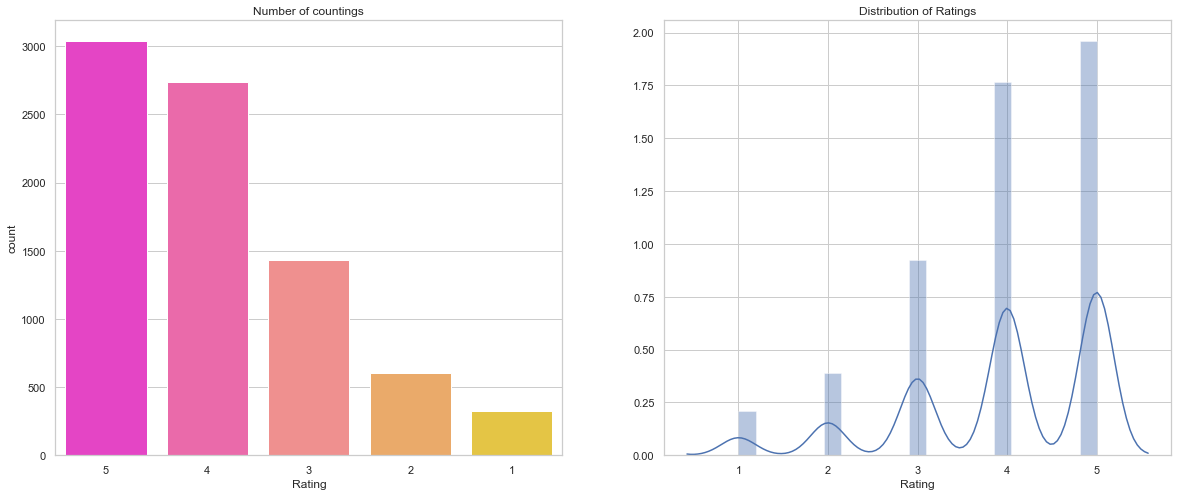

In [15]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df['rating'], palette = 'spring', order = list(range(5, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df['rating'], ax = ax[1])
sns_1.set_title('Number of countings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

Text(0.5, 0, 'Dist Of Polarity')

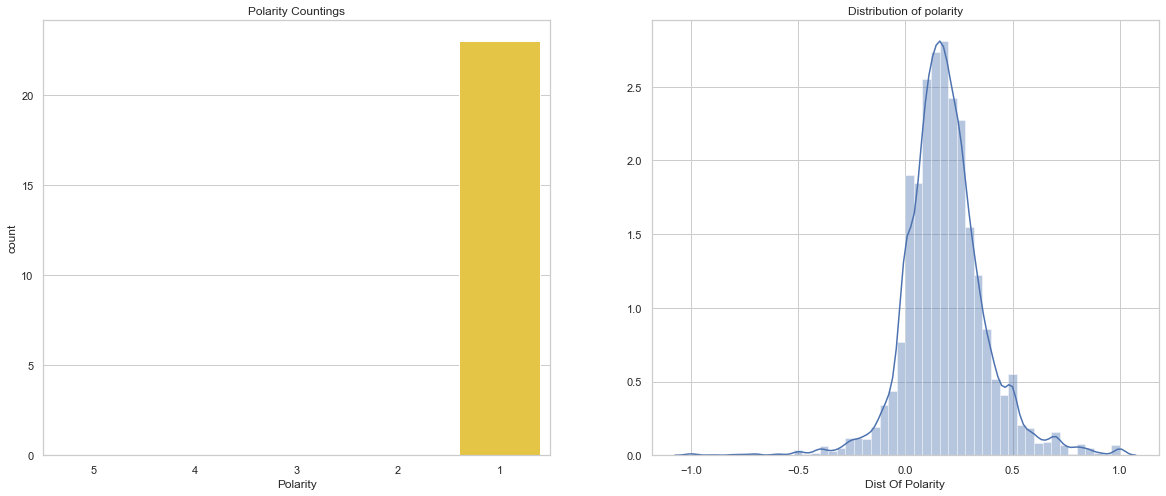

In [16]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df['polarity'], palette = 'spring', order = list(range(5, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df['polarity'], ax = ax[1])
sns_1.set_title('Polarity Countings')
sns_1.set_xlabel("Polarity")

sns_2.set_title('Distribution of polarity')
sns_2.set_xlabel("Dist Of Polarity")

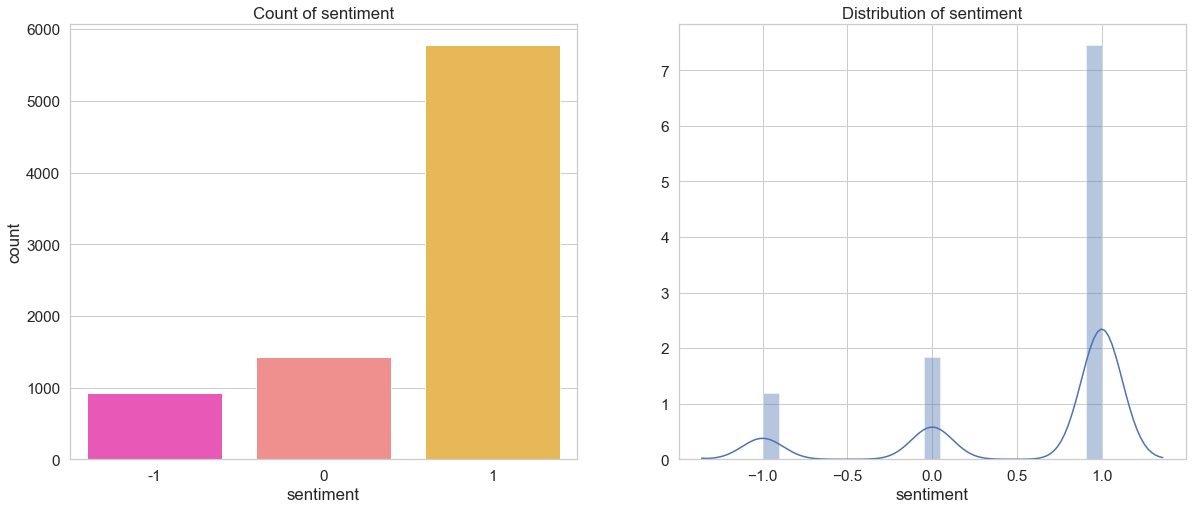

In [17]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df['sent'], palette = 'spring', order = list(range(-1,2)), ax = ax[0])
sns_2 = sns.distplot(df['sent'], ax = ax[1])
sns_1.set_title('Count of sentiment')
sns_1.set_xlabel("sentiment")

sns_2.set_title('Distribution of sentiment')
sns_2.set_xlabel("sentiment");

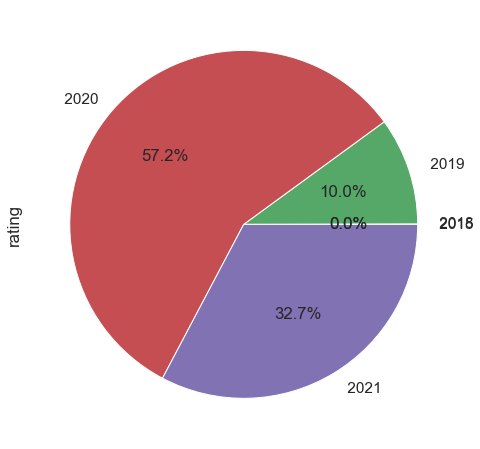

In [18]:
#groupby the data by delivery type
data = df.groupby("year")["rating"].sum()
data
data.plot.pie(autopct="%.1f%%");

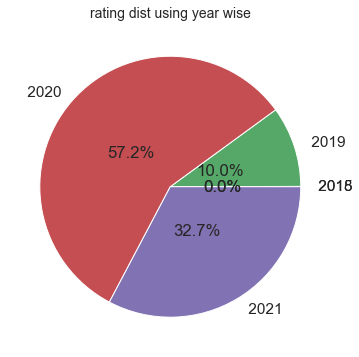

In [19]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data,autopct="%.1f%%", labels=labels, pctdistance=0.4)
plt.title("rating dist using year wise", fontsize=14);
pie.savefig("PieChart.png")